# Tema 3: Evaluación de algortimos de clasificación
## Cuaderno de ejercicios

**Ejercicio 1**

Supongamos que hemos utilizado un clasificador, por ejemplo, Naive Bayes, para clasificar documentos con respecto al sentimiento. Las clases son Pos (positivo), Neg (negativo) y Neu (neutro). Probamos nuestro clasificador en 10 documentos para los que conocemos su _gold standar_ (clase real). La prueba tiene los siguientes resultados:

| Documento | Clase Real | Clase predicha |
| ------------- | ------------- | ------------- |
| d1  | Pos  | Pos |
| d2  | Pos  | Pos |
| d3  | Pos  | Pos |
| d4  | Pos  | Neu |
| d5  | Neg  | Neg |
| d6  | Neg  | Neu |
| d7  | Neg  | Neg |
| d8  | Neu  | Pos |
| d9  | Neu  | Neu |
| d10  | Neu  | Neu |

Calcular: precision, recall, accuracy y F1 para estos resultados de clasificación para las tres clases.


**Ejercicio 2**

Se evaluó un clasificador binario utilizando un conjunto de 1000 ejemplos de prueba (test) en los que el 50 % de todos los ejemplos son negativos. El clasificador tiene 60 % de sensitivity y 70 % de accuracy. Escribe la matriz de confusión.

**Ejercicio 3**

Utilizando la matriz de confusión creada en el ejercicio anterior, calcula la precisión del clasificador, la medida F1 y
especificidad.

# Solucion Ejercicio 1

## Cargamos la librerias y creamos con la data del ejercicio los valores reales y predichos

In [93]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_ver=np.array(["Pos", "Pos", "Pos", "Pos", "Neg", "Neg", "Neg", "Neu", "Neu", "Neu"])
y_pre=np.array(["Pos", "Pos", "Pos", "Neu", "Neg", "Neu", "Neg", "Pos", "Neu", "Neu"])

### Calculamos la matriz de confusion

In [124]:
mc = confusion_matrix(y_ver, y_pre)
mc

array([[2, 1, 0],
       [0, 2, 1],
       [0, 1, 3]], dtype=int64)

### Cargamos las librerias de visualizacion

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

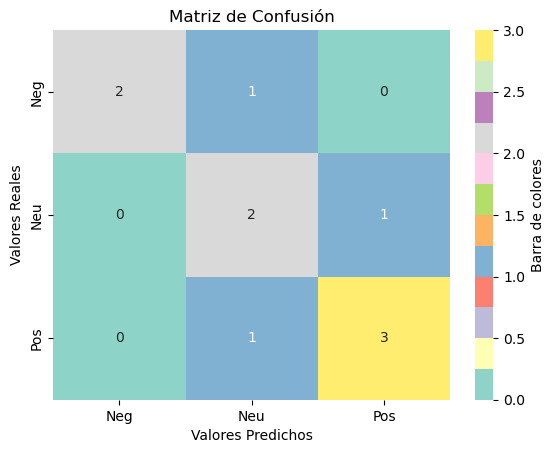

In [126]:
sns.heatmap(mc,cmap='Set3',xticklabels=['Neg', 'Neu', 'Pos'], yticklabels=['Neg', 'Neu', 'Pos'], annot=True, cbar_kws={'label':"Barra de colores"})
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

### Calculo de la accuracy
#### Importamos la funcion para el calculo del accuracy

In [127]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_ver,y_pre)
accuracy

0.7

### Calculo del recall

In [128]:
from sklearn.metrics import recall_score
recall_pos=recall_score(y_ver,y_pre, average='weighted', labels=['Pos'])
recall_neg=recall_score(y_ver,y_pre, average='weighted', labels=['Neg'])
recall_neu=recall_score(y_ver,y_pre, average='weighted', labels=['Neu'])
print('Recall positivo',recall_pos)
print('Recall negativo',recall_neg)
print('Recall neutro',recall_neu)

Recall positivo 0.75
Recall negativo 0.6666666666666666
Recall neutro 0.6666666666666666


### Calculo de la precisión

In [129]:
from sklearn.metrics import precision_score
prec_pos=precision_score(y_ver,y_pre, average='weighted', labels=['Pos'])
prec_neg=precision_score(y_ver,y_pre, average='weighted', labels=['Neg'])
prec_neu=precision_score(y_ver,y_pre, average='weighted', labels=['Neu'])
print('precisión positiva: ',prec_pos)
print('precisión negativa: ',prec_neg)
print('precisión neutra: ',prec_neu)

precisión positiva:  0.75
precisión negativa:  1.0
precisión neutra:  0.5


### Calculo del F1

In [130]:
from sklearn.metrics import f1_score
f1_pos = f1_score(y_ver,y_pre,average='weighted',labels=['Pos'])
f1_neg = f1_score(y_ver,y_pre,average='weighted',labels=['Neg'])
f1_neu = f1_score(y_ver,y_pre,average='weighted',labels=['Neu'])
print('Valor de F1 positivo',f1_pos)
print('Valor de F1 negativo',f1_neg)
print('Valor de F1 neutro',f1_neu)

Valor de F1 positivo 0.75
Valor de F1 negativo 0.8000000000000002
Valor de F1 neutro 0.5714285714285715


# Solucion del ejercicio 2

Se evaluó un clasificador binario utilizando un conjunto de 1000 ejemplos de prueba (test) en los que el 50 % de todos los ejemplos son negativos. El clasificador tiene 60 % de sensitivity y 70 % de accuracy. Escribe la matriz de confusión.

Formula de Accuracy:

$$Accuracy =\frac{(TP+TN)}{TP+TN+FN+FP}$$

Formula de Sensivility:

$$Sensivility =\frac{TP}{TP+FN}$$

Reemplazando los datos en las ecuacion de sensibilidad:
$$0.6 =\frac{TP}{500}$$
$${0.6}\times{500}=TP$$
$$TP=300$$
Por lo tanto:
$$FN + TP = 500$$
$$FN=200$$
Reemplazando en la formula de Accuracy tenemos:
$$0.7 =\frac{(30+TN)}{1000}$$
$$TN = 400$$
$$FP = 100$$
Con esos valores procedemos a crearla matriz

In [109]:
acc=0.7
sensi=0.6
TP=(500*sensi)
print('Verdaderos positivos TP:',TP)
FN=(500-TP)
print('Falsos negativos FN:',FN)
TN=(acc*1000)-TP
print('Verdaderos negativos TN:',TN)
FP=(500-TN)
print('Falsos positivos FP:',FP)

Verdaderos positivos TP: 300.0
Falsos negativos FN: 200.0
Verdaderos negativos TN: 400.0
Falsos positivos FP: 100.0


In [155]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix([1]*int(TP)+[0]*int(FP)+[0]*int(FN)+[1]*int(TN),[1]*500+[0]*500)
cm

array([[100, 200],
       [400, 300]], dtype=int64)

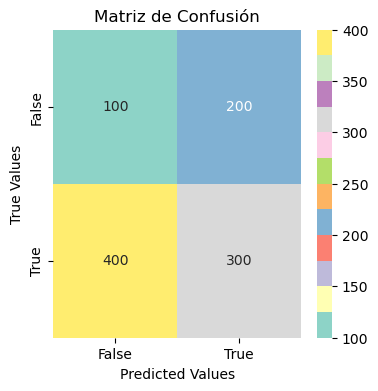

In [156]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Set3', xticklabels=['False','True'], yticklabels=['False','True'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

# Solucion Ejercicio 3

Segun entiendo, si se tiene la matriz de confusión, con los valores y sin conocer previamente los valores verdaderos y predichos no es posible obtener estos valores, por lo que este punto se realizaria con solo formulas, sin embargo me gustaria validar que esto es correcto.